# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import openweathermapy as ow
import pandas as pd
import numpy as np
import requests
from pprint import pprint
import time
import json
import os

# Import API key
from api_key import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"
output_directory="../starter_code"

#output_data_file = os.path.join"output_data/cities.csv"
## Save the updated dataframe as a csv => data.to_csv() note for later##

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# Empty lists for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Utilized Openweather base url with api_key & units to be able to pull data necessary

#query_url = f'https://api.openweathermap.org/data/2.5/weather?appid={api_key}&units=imperial&q={city}'
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + api_key + "&q=" + city + "&units=imperial"
response_quest=requests.get(url)
#to check if url was accepted
print(requests.get(query_url))

#Made a data frame to add information in necessary for analysis and plotting 
#They are the columns for the csv will be making
data_df=pd.DataFrame({"City":[],"Country":[], "Lat":[], "Lng":[],
                      "Max Temperature":[],"Cloudiness":[],
                      "Humidity":[],"Wind Speed":[], "Date":[]})
data_df

<Response [200]>


,City,Country,Lat,Lng,Max Temperature,Cloudiness,Humidity,Wind Speed,Date


In [4]:
##STEPS:To know how long it would take to gather data: 
response_request=requests.post(query_url)

#City count on the list 
cities_count=(len(cities))

respond_time_length=response_request.elapsed.total_seconds()/60

In [5]:
response=requests.get(query_url).json()
#print(json.dumps(response, indent=4, sort_keys=True))

In [15]:
##STEPS:'For' loop to scan the cities in the list & pull them from url
#and the will comeout in json form 

#for every city in the cities list it will do a request on url for data
x=0

print(f"Beginning Data Retrival")
print(f"---------------------------")

for city in cities: 
    url = "http://api.openweathermap.org/data/2.5/weather?"
    query_url = url + "appid=" + api_key + "&q=" + city + "&units=imperial"
    #response_quest=requests.get(url)
    #q_url=f"{url}&q={city}&units=imperial"
    response_request=requests.get(query_url)
    response = response_request.json()
    time.sleep(1.01)

#x=0 to start the record porcesssing at 0 and loop/iterate thru the cities

    if (response["cod"]==200):

        
#.loc to move city info into the correct columns 
        data_df.loc[x,"City"] = city
        data_df.loc[x,"Cloudiness"] = response['clouds']['all']
        
        data_df.loc[x,"Country"] = response['sys']['country']
        data_df.loc[x,"Date"] = response['dt']
        data_df.loc[x,"Humidity"] = response['main']['humidity']
        data_df.loc[x,"Lat"] = response['coord']['lat']
        data_df.loc[x,"Lng"] = response['coord']['lon']
        data_df.loc[x,"Max Temperature"] = response['main']['temp_max']
        data_df.loc[x,"Wind Speed"] = response['wind']['speed']
        print(f"Record Processed {x} | {city}")
        print(response_request.url)
        
        x=x+1
        
#else to continue with the loop and move on to the next city        
    else:
        print("City not found") 
        
#except if get error when looking for data it will continue looping        
    #except (KeyError, IndexError):
        #print("Missing field. Skipping.")

print("Data Gathering Complete")

Beginning Data Retrival
---------------------------
Record Processed 0 | atuona
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=atuona&units=imperial
Record Processed 1 | flinders
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=flinders&units=imperial
Record Processed 2 | hilo
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=hilo&units=imperial
Record Processed 3 | hobart
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=hobart&units=imperial
Record Processed 4 | ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=ushuaia&units=imperial
City not found
Record Processed 5 | ialibu
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=ialibu&units=imperial
Record Processed 6 | new norfolk
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5e

City not found
Record Processed 57 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=severo-kurilsk&units=imperial
Record Processed 58 | rikitea
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=rikitea&units=imperial
Record Processed 59 | cidreira
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=cidreira&units=imperial
Record Processed 60 | komsomolskiy
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=komsomolskiy&units=imperial
Record Processed 61 | inuvik
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=inuvik&units=imperial
Record Processed 62 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=bredasdorp&units=imperial
Record Processed 63 | pevek
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b

Record Processed 113 | chuy
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=chuy&units=imperial
Record Processed 114 | butaritari
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=butaritari&units=imperial
Record Processed 115 | clarksburg
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=clarksburg&units=imperial
Record Processed 116 | gisborne
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=gisborne&units=imperial
Record Processed 117 | mar del plata
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=mar%20del%20plata&units=imperial
Record Processed 118 | kapaa
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=kapaa&units=imperial
Record Processed 119 | yeppoon
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=yeppoon&u

Record Processed 169 | la ronge
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=la%20ronge&units=imperial
Record Processed 170 | kavieng
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=kavieng&units=imperial
Record Processed 171 | lenart
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=lenart&units=imperial
Record Processed 172 | codrington
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=codrington&units=imperial
Record Processed 173 | saint-pierre
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=saint-pierre&units=imperial
Record Processed 174 | sambava
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=sambava&units=imperial
Record Processed 175 | monterey
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=monterey&u

Record Processed 225 | camacha
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=camacha&units=imperial
City not found
Record Processed 226 | nome
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=nome&units=imperial
Record Processed 227 | san rafael
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=san%20rafael&units=imperial
Record Processed 228 | praya
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=praya&units=imperial
Record Processed 229 | hereford
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=hereford&units=imperial
Record Processed 230 | krasnoturansk
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=krasnoturansk&units=imperial
Record Processed 231 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=t

Record Processed 281 | san cristobal
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=san%20cristobal&units=imperial
Record Processed 282 | imeni poliny osipenko
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=imeni%20poliny%20osipenko&units=imperial
Record Processed 283 | hambantota
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=hambantota&units=imperial
Record Processed 284 | manaus
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=manaus&units=imperial
Record Processed 285 | elat
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=elat&units=imperial
Record Processed 286 | pierre
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=pierre&units=imperial
Record Processed 287 | mocuba
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b5

Record Processed 336 | katakwi
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=katakwi&units=imperial
Record Processed 337 | chimbarongo
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=chimbarongo&units=imperial
Record Processed 338 | khatanga
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=khatanga&units=imperial
Record Processed 339 | coquimbo
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=coquimbo&units=imperial
Record Processed 340 | itarema
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=itarema&units=imperial
Record Processed 341 | goderich
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=goderich&units=imperial
Record Processed 342 | ati
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=ati&units=imperial


Record Processed 393 | antalaha
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=antalaha&units=imperial
Record Processed 394 | kharagauli
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=kharagauli&units=imperial
City not found
Record Processed 395 | emerald
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=emerald&units=imperial
City not found
Record Processed 396 | klaksvik
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=klaksvik&units=imperial
City not found
Record Processed 397 | mount isa
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=mount%20isa&units=imperial
Record Processed 398 | banamba
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=banamba&units=imperial
Record Processed 399 | tobol
http://api.openweathermap.org/data/2.5/weather?appid=811a5

Record Processed 449 | necochea
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=necochea&units=imperial
Record Processed 450 | aldan
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=aldan&units=imperial
Record Processed 451 | la union
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=la%20union&units=imperial
Record Processed 452 | pacific grove
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=pacific%20grove&units=imperial
Record Processed 453 | shingu
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=shingu&units=imperial
Record Processed 454 | vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=vestmannaeyjar&units=imperial
Record Processed 455 | tamale
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=ta

Record Processed 505 | oum hadjer
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=oum%20hadjer&units=imperial
Record Processed 506 | ingham
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=ingham&units=imperial
Record Processed 507 | panji
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=panji&units=imperial
Record Processed 508 | general roca
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=general%20roca&units=imperial
Record Processed 509 | nyakabindi
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=nyakabindi&units=imperial
Record Processed 510 | guerrero negro
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b81cd&q=guerrero%20negro&units=imperial
Record Processed 511 | cascais
http://api.openweathermap.org/data/2.5/weather?appid=811a50b720b718b5eef97b54319b

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
#Perform .count() to know the number of entries/ ensure no missing data
data_df.count()

City               618
Country            618
Lat                618
Lng                618
Max Temperature    618
Cloudiness         618
Humidity           618
Wind Speed         618
Date               618
dtype: int64

In [17]:
data_df.loc[1,"City"]

'flinders'

In [18]:
# To display data frame 
data_df.head()

,City,Country,Lat,Lng,Max Temperature,Cloudiness,Humidity,Wind Speed,Date
0,atuona,PF,-9.80,-139.03,79.73,1.0,75.0,13.78,1.563836e+09
1,flinders,AU,-34.58,150.85,62.01,0.0,50.0,8.05,1.563836e+09
2,hilo,US,19.71,-155.08,82.00,90.0,88.0,9.98,1.563836e+09
3,hobart,AU,-42.88,147.33,48.99,75.0,66.0,5.82,1.563836e+09
4,ushuaia,AR,-54.81,-68.31,33.80,40.0,80.0,5.82,1.563836e+09


In [19]:
#To save data frame as a CSV file 
output=os.path.join(output_data_file,output_directory)
data_df.to_csv(output)

In [20]:
data_df.head()

,City,Country,Lat,Lng,Max Temperature,Cloudiness,Humidity,Wind Speed,Date
0,atuona,PF,-9.80,-139.03,79.73,1.0,75.0,13.78,1.563836e+09
1,flinders,AU,-34.58,150.85,62.01,0.0,50.0,8.05,1.563836e+09
2,hilo,US,19.71,-155.08,82.00,90.0,88.0,9.98,1.563836e+09
3,hobart,AU,-42.88,147.33,48.99,75.0,66.0,5.82,1.563836e+09
4,ushuaia,AR,-54.81,-68.31,33.80,40.0,80.0,5.82,1.563836e+09


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [14]:
#To change the date format on the table  https://docs.python.org/2/library/time.html
#date_change = data_df.Date[0]
#formatted_time = time.strftime("%b %d %Y", time.localtime(date_change))

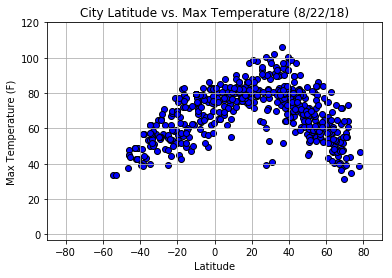

In [21]:
#Plotting and labels!
plt.scatter(x=data_df["Lat"], y=data_df["Max Temperature"],marker="o", edgecolor="black", color="blue")
plt.title("City Latitude vs. Max Temperature (8/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

#change x axis to reflect all data from lists
plt.xlim(-90, 90)
plt.ylim(-3, 120)

#Save the figure
#plt.savefig("starter_code/lat_temp.png")
#to show graph
plt.show()

#### Latitude vs. Humidity Plot

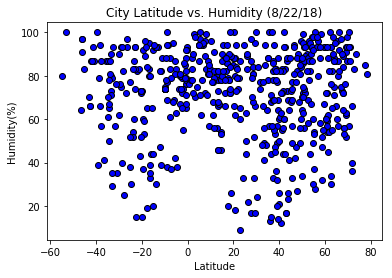

In [24]:
plt.scatter(data_df["Lat"],data_df["Humidity"],marker="o", edgecolor="black", color="blue")
plt.title("City Latitude vs. Humidity (8/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")


#Save the figure
#plt.savefig("starter_code/lat_humidity.png")
#to show graph
plt.show()

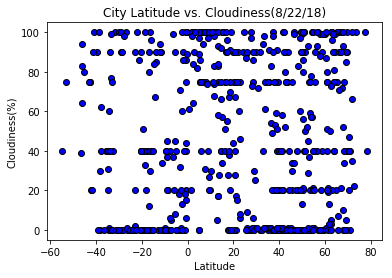

In [25]:
plt.scatter(data_df["Lat"],data_df["Cloudiness"],marker="o", edgecolor="black", color="blue")
plt.title("City Latitude vs. Cloudiness(8/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")


#Save the figure
#plt.savefig("output_plots/lat_cloud.png")
#to show graph
plt.show()

#### Latitude vs. Wind Speed Plot

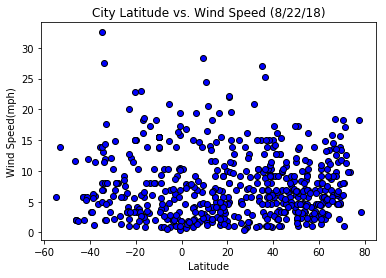

In [26]:
plt.scatter(data_df["Lat"],data_df["Wind Speed"],marker="o", edgecolor="black", color="blue")
plt.title("City Latitude vs. Wind Speed (8/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")


#Save the figure
#plt.savefig("starter_code/lat_wind.png")
#to show graph
plt.show()